In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("D:\\Vcodez\\finalproject\\Dataset\\movie.csv")
df.head()

,rank,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,2,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,3,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,4,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,5,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           1000 non-null   int64  
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [4]:
df.describe()

,rank,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,1000.000000,843.000000,1.000000e+03
mean,500.500000,7.949300,77.971530,2.736929e+05
std,288.819436,0.275491,12.376099,3.273727e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.750000,7.700000,70.000000,5.552625e+04
50%,500.500000,7.900000,79.000000,1.385485e+05
75%,750.250000,8.100000,87.000000,3.741612e+05
max,1000.000000,9.300000,100.000000,2.343110e+06


In [5]:
df.shape

(1000, 16)

DATA CLEANING

In [6]:
df.isnull().sum()

rank               0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [7]:
df['Certificate'].fillna(value='Not available',inplace=True) 

C:\Users\vijay\AppData\Local\Temp\ipykernel_9824\888733101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(value='Not available',inplace=True)


In [8]:
df['Certificate'].fillna(method='ffill',inplace=True) 

C:\Users\vijay\AppData\Local\Temp\ipykernel_9824\2780369265.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Certificate'].fillna(method='ffill',inplace=True)


In [9]:
df['Certificate'].fillna(method='bfill',inplace=True)

C:\Users\vijay\AppData\Local\Temp\ipykernel_9824\3801515344.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Certificate'].fillna(method='bfill',inplace=True)


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

rank             0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
990    False
991    False
992    False
994    False
997    False
Length: 750, dtype: bool

In [13]:
df['Runtime'] = df['Runtime'].astype(str).str.extract('(\d+)').astype(float)
df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')


In [14]:
df.head()

,rank,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,2,The Godfather,1972,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,3,The Dark Knight,2008,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,4,The Godfather: Part II,1974,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,5,12 Angry Men,1957,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


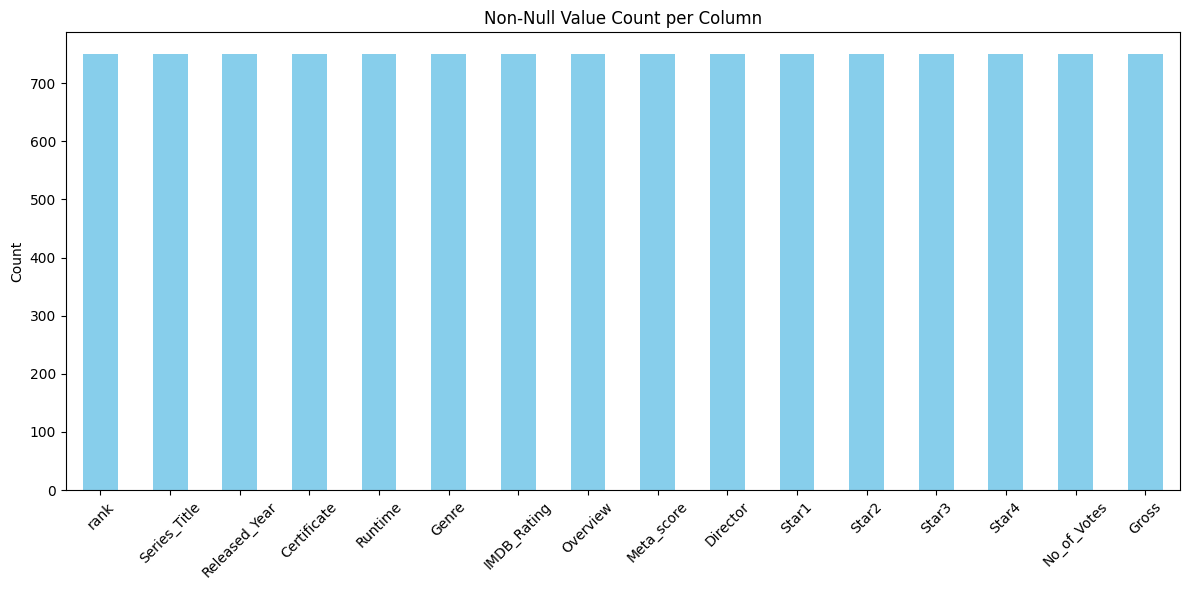

In [15]:
plt.figure(figsize=(12, 6))
df.notnull().sum().plot(kind='bar', color='skyblue')
plt.title('Non-Null Value Count per Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Movie Released Year

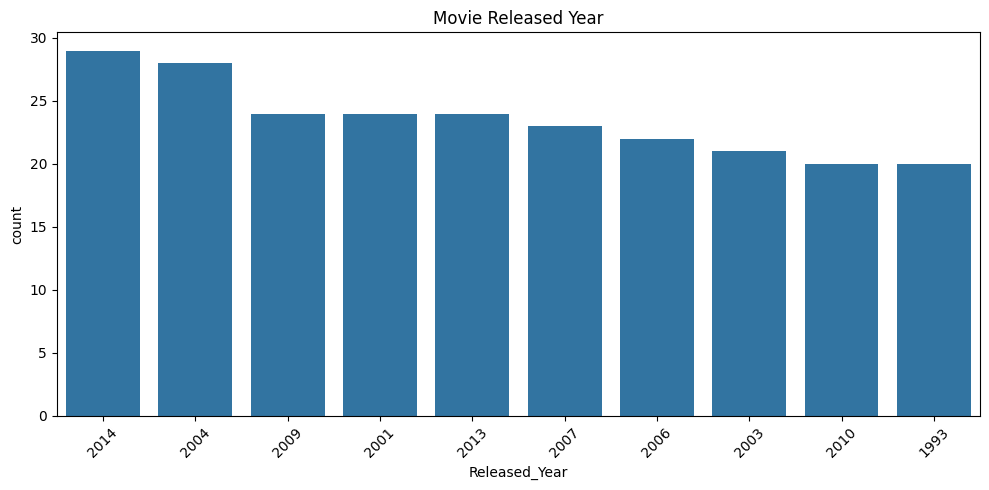

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Released_Year', order=df['Released_Year'].value_counts().index[:10])
plt.title('Movie Released Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Movie Runtime

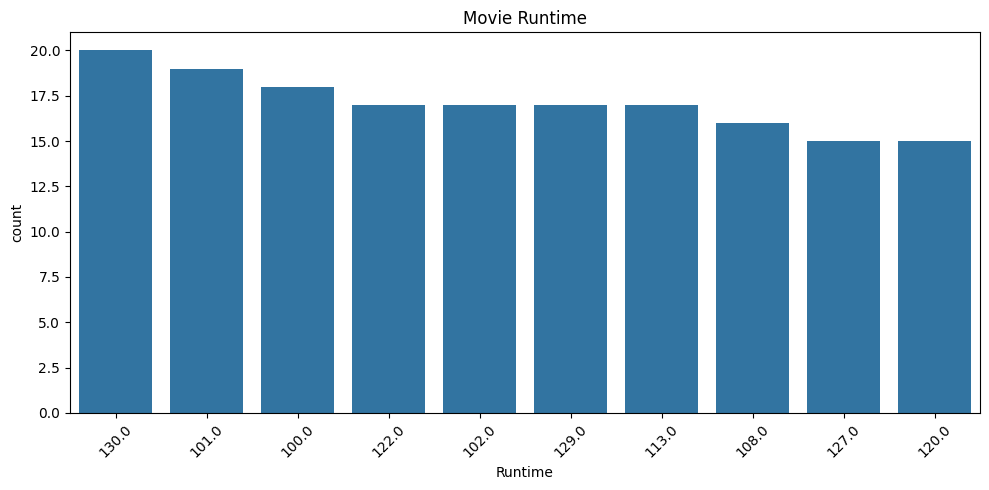

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Runtime', order=df['Runtime'].value_counts().index[:10])
plt.title('Movie Runtime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Movie Count by Certificate


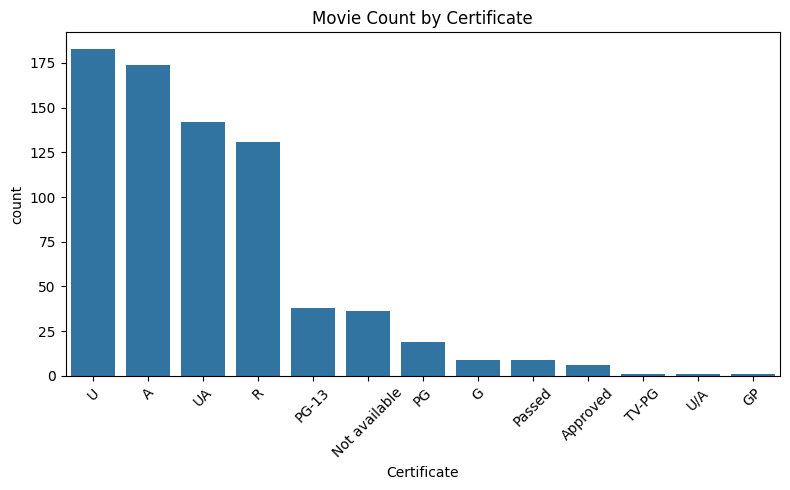

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index)
plt.title('Movie Count by Certificate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of IMDB Ratings


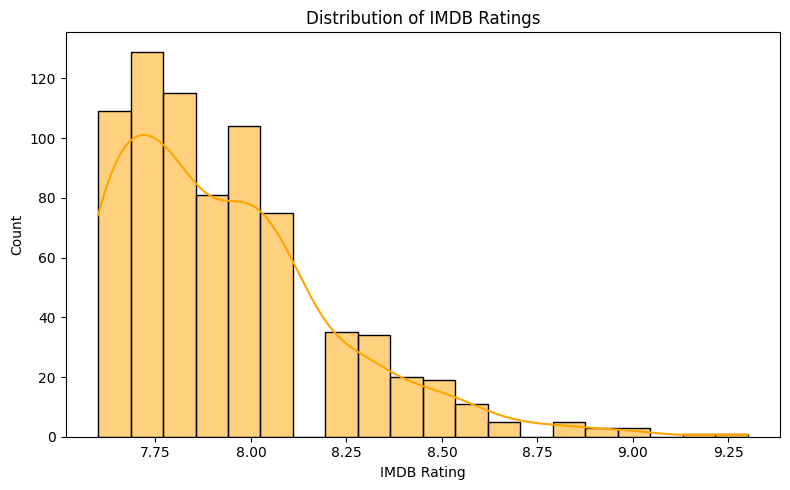

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.tight_layout()
plt.show()

Boxplot of IMDB Ratings by Top Genres


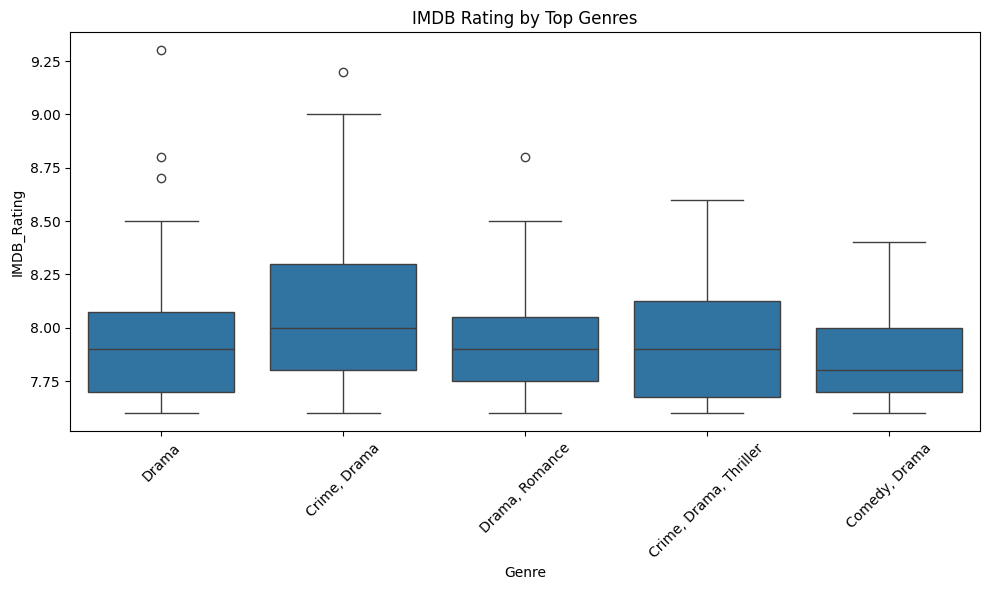

In [20]:
top_genres = df['Genre'].value_counts().index[:5]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['Genre'].isin(top_genres)], x='Genre', y='IMDB_Rating')
plt.title('IMDB Rating by Top Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Scatter Plot: Gross vs IMDB Rating


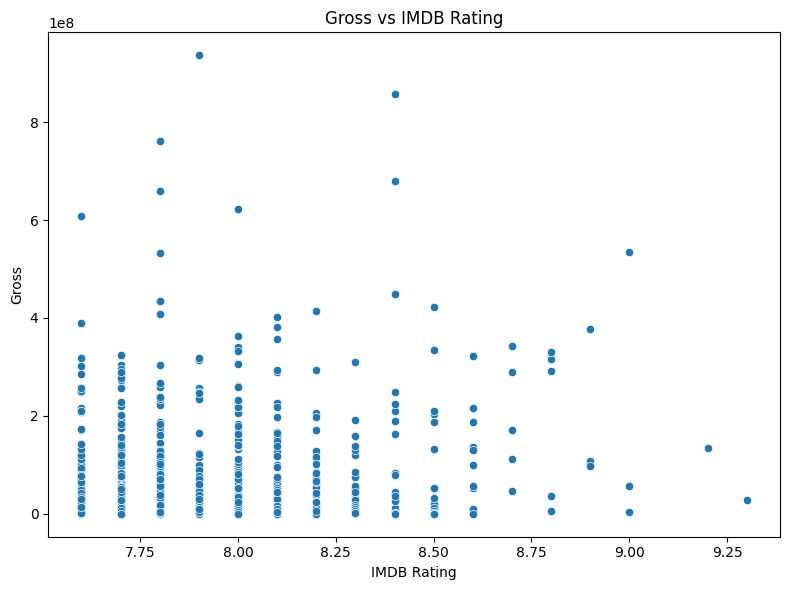

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='IMDB_Rating', y='Gross')
plt.title('Gross vs IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross')
plt.tight_layout()
plt.show()

Line Chart: Average IMDB Rating Over Years


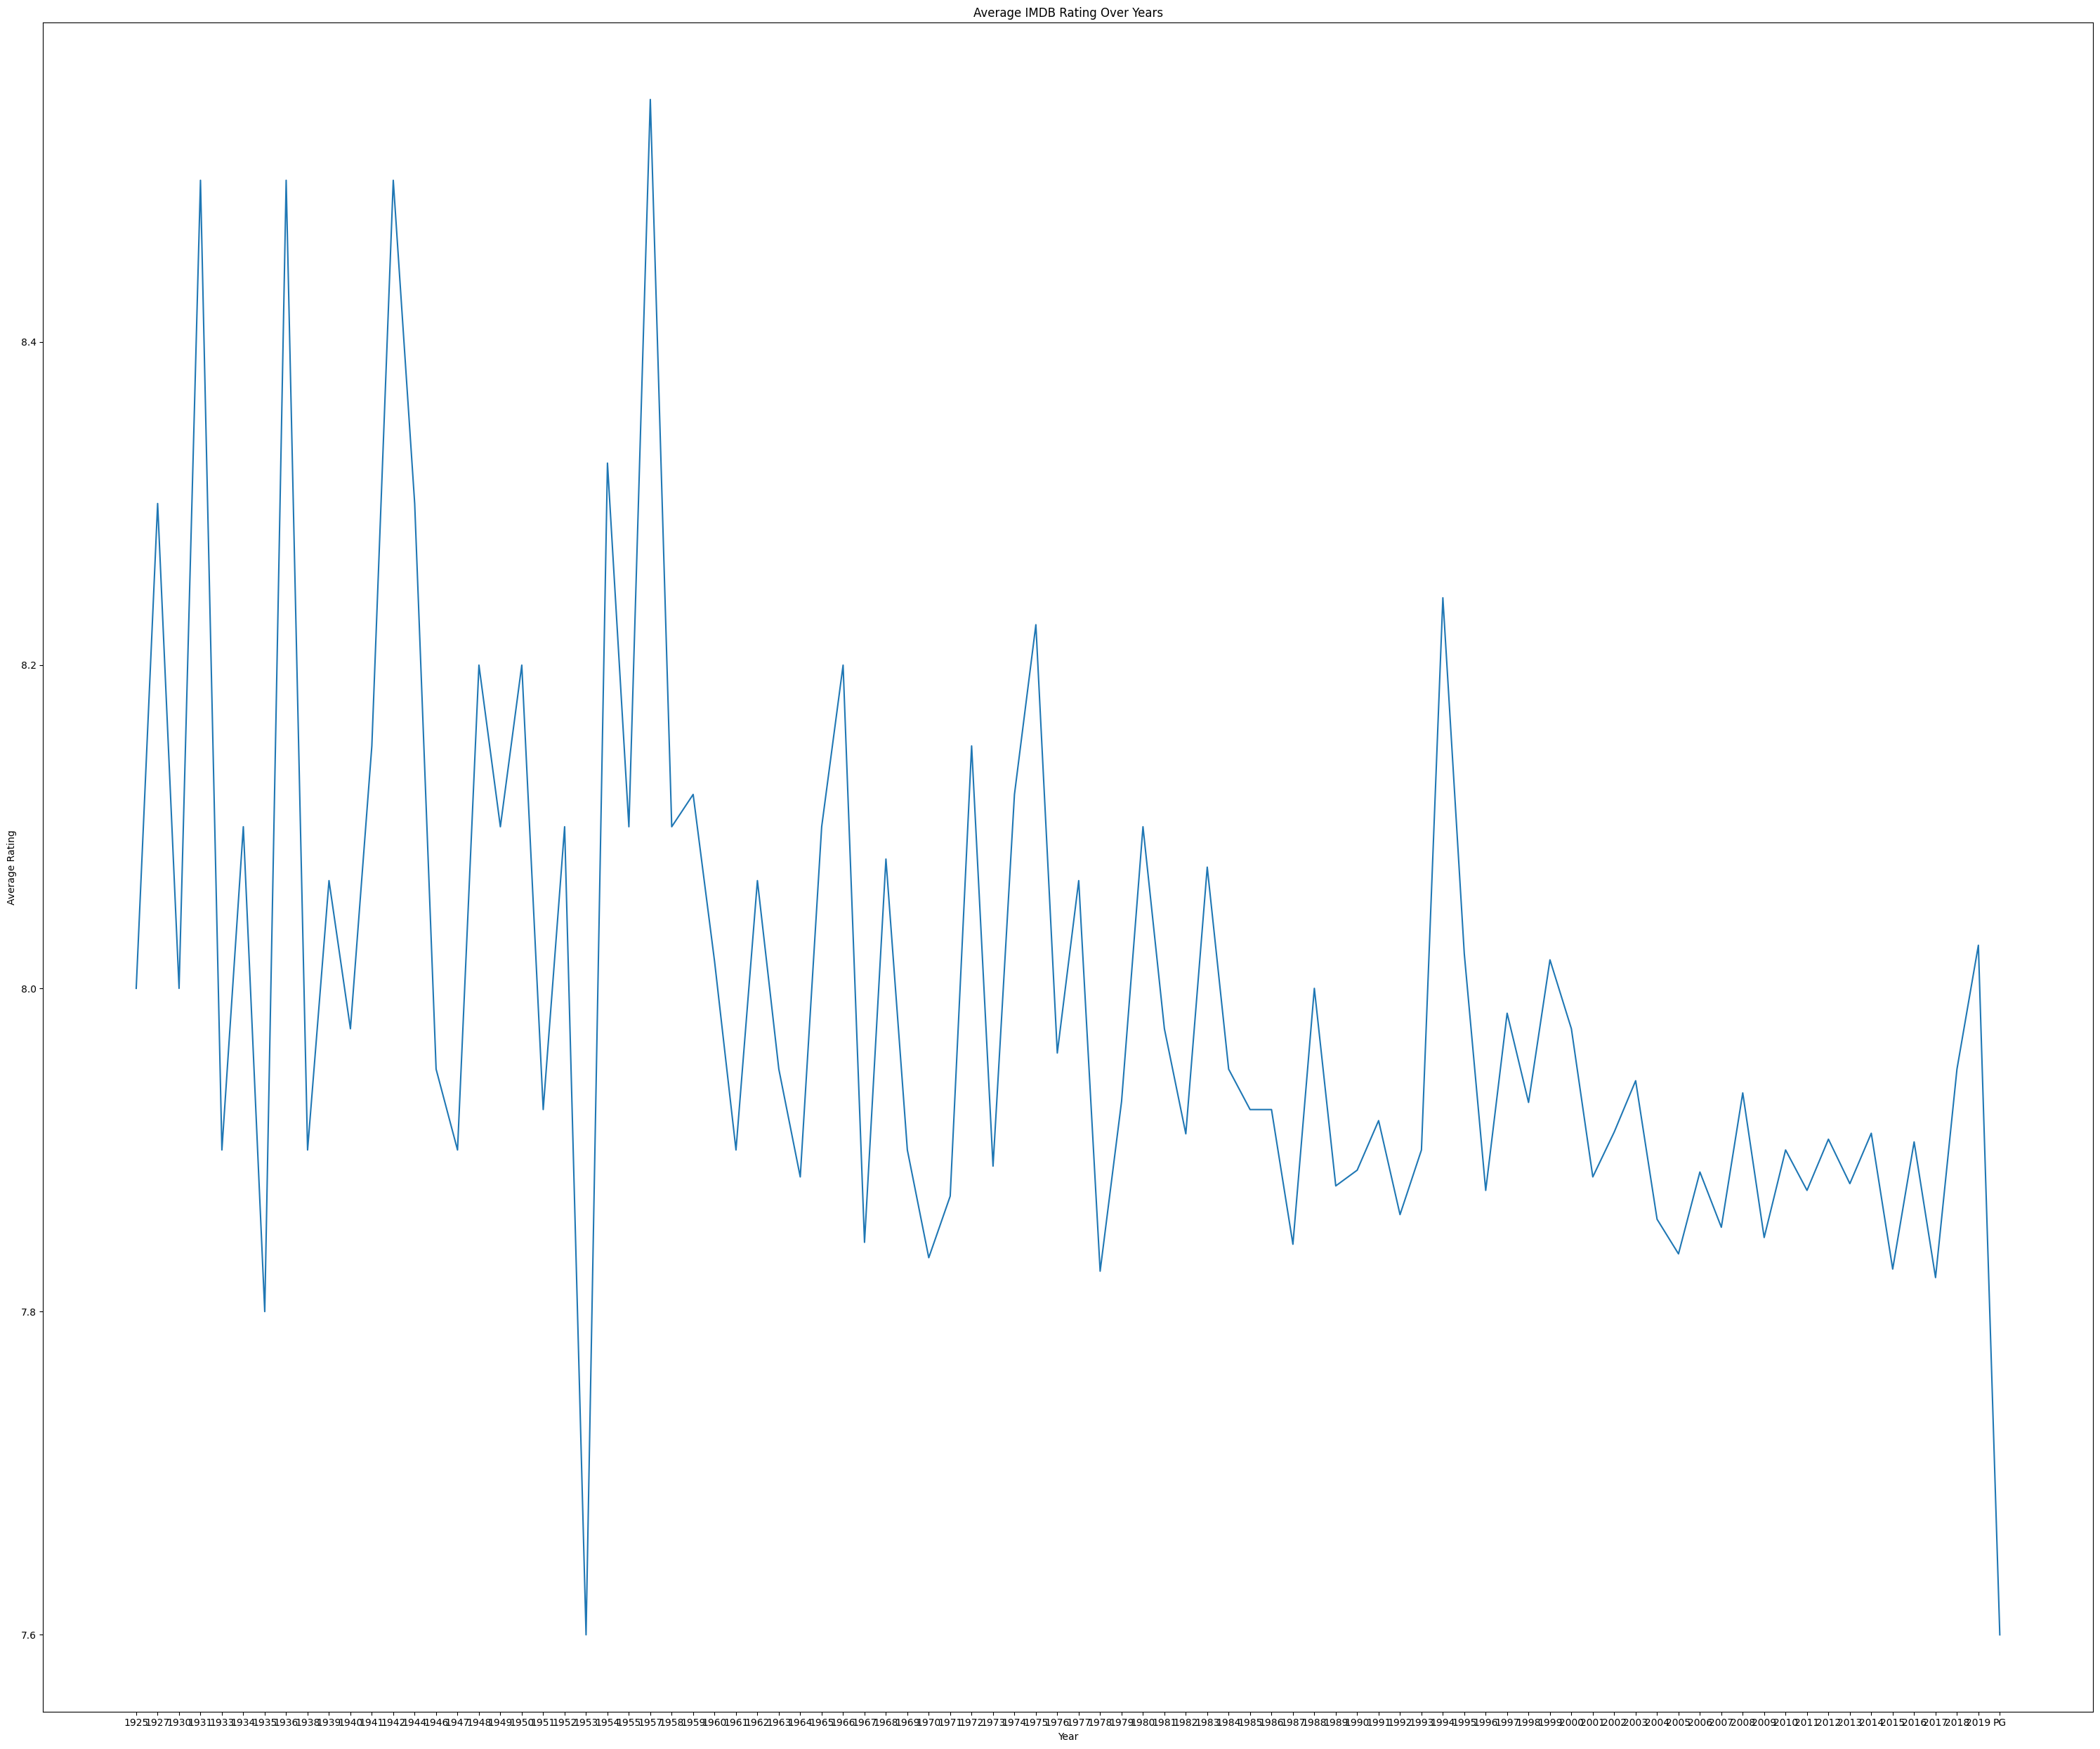

In [22]:
df_yearly = df.groupby('Released_Year')['IMDB_Rating'].mean().reset_index()
plt.figure(figsize=(30, 25))
sns.lineplot(data=df_yearly, x='Released_Year', y='IMDB_Rating')
plt.title('Average IMDB Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

Average IMDB Rating per Director (Top 10)

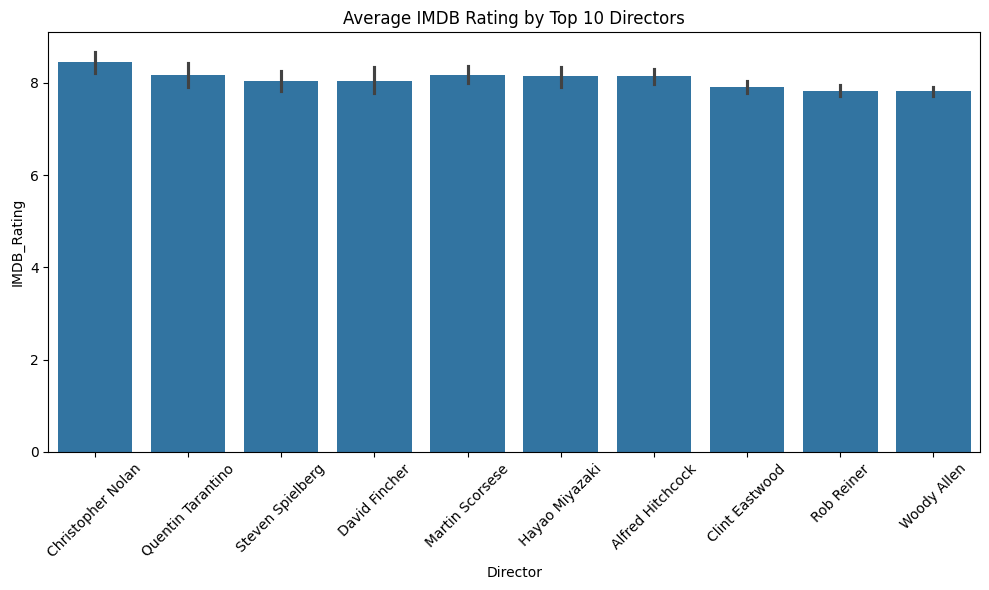

In [23]:
top_directors = df['Director'].value_counts().index[:10]
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df['Director'].isin(top_directors)],
    x='Director',
    y='IMDB_Rating',
    estimator=np.mean
)
plt.title('Average IMDB Rating by Top 10 Directors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Movie Count by Year

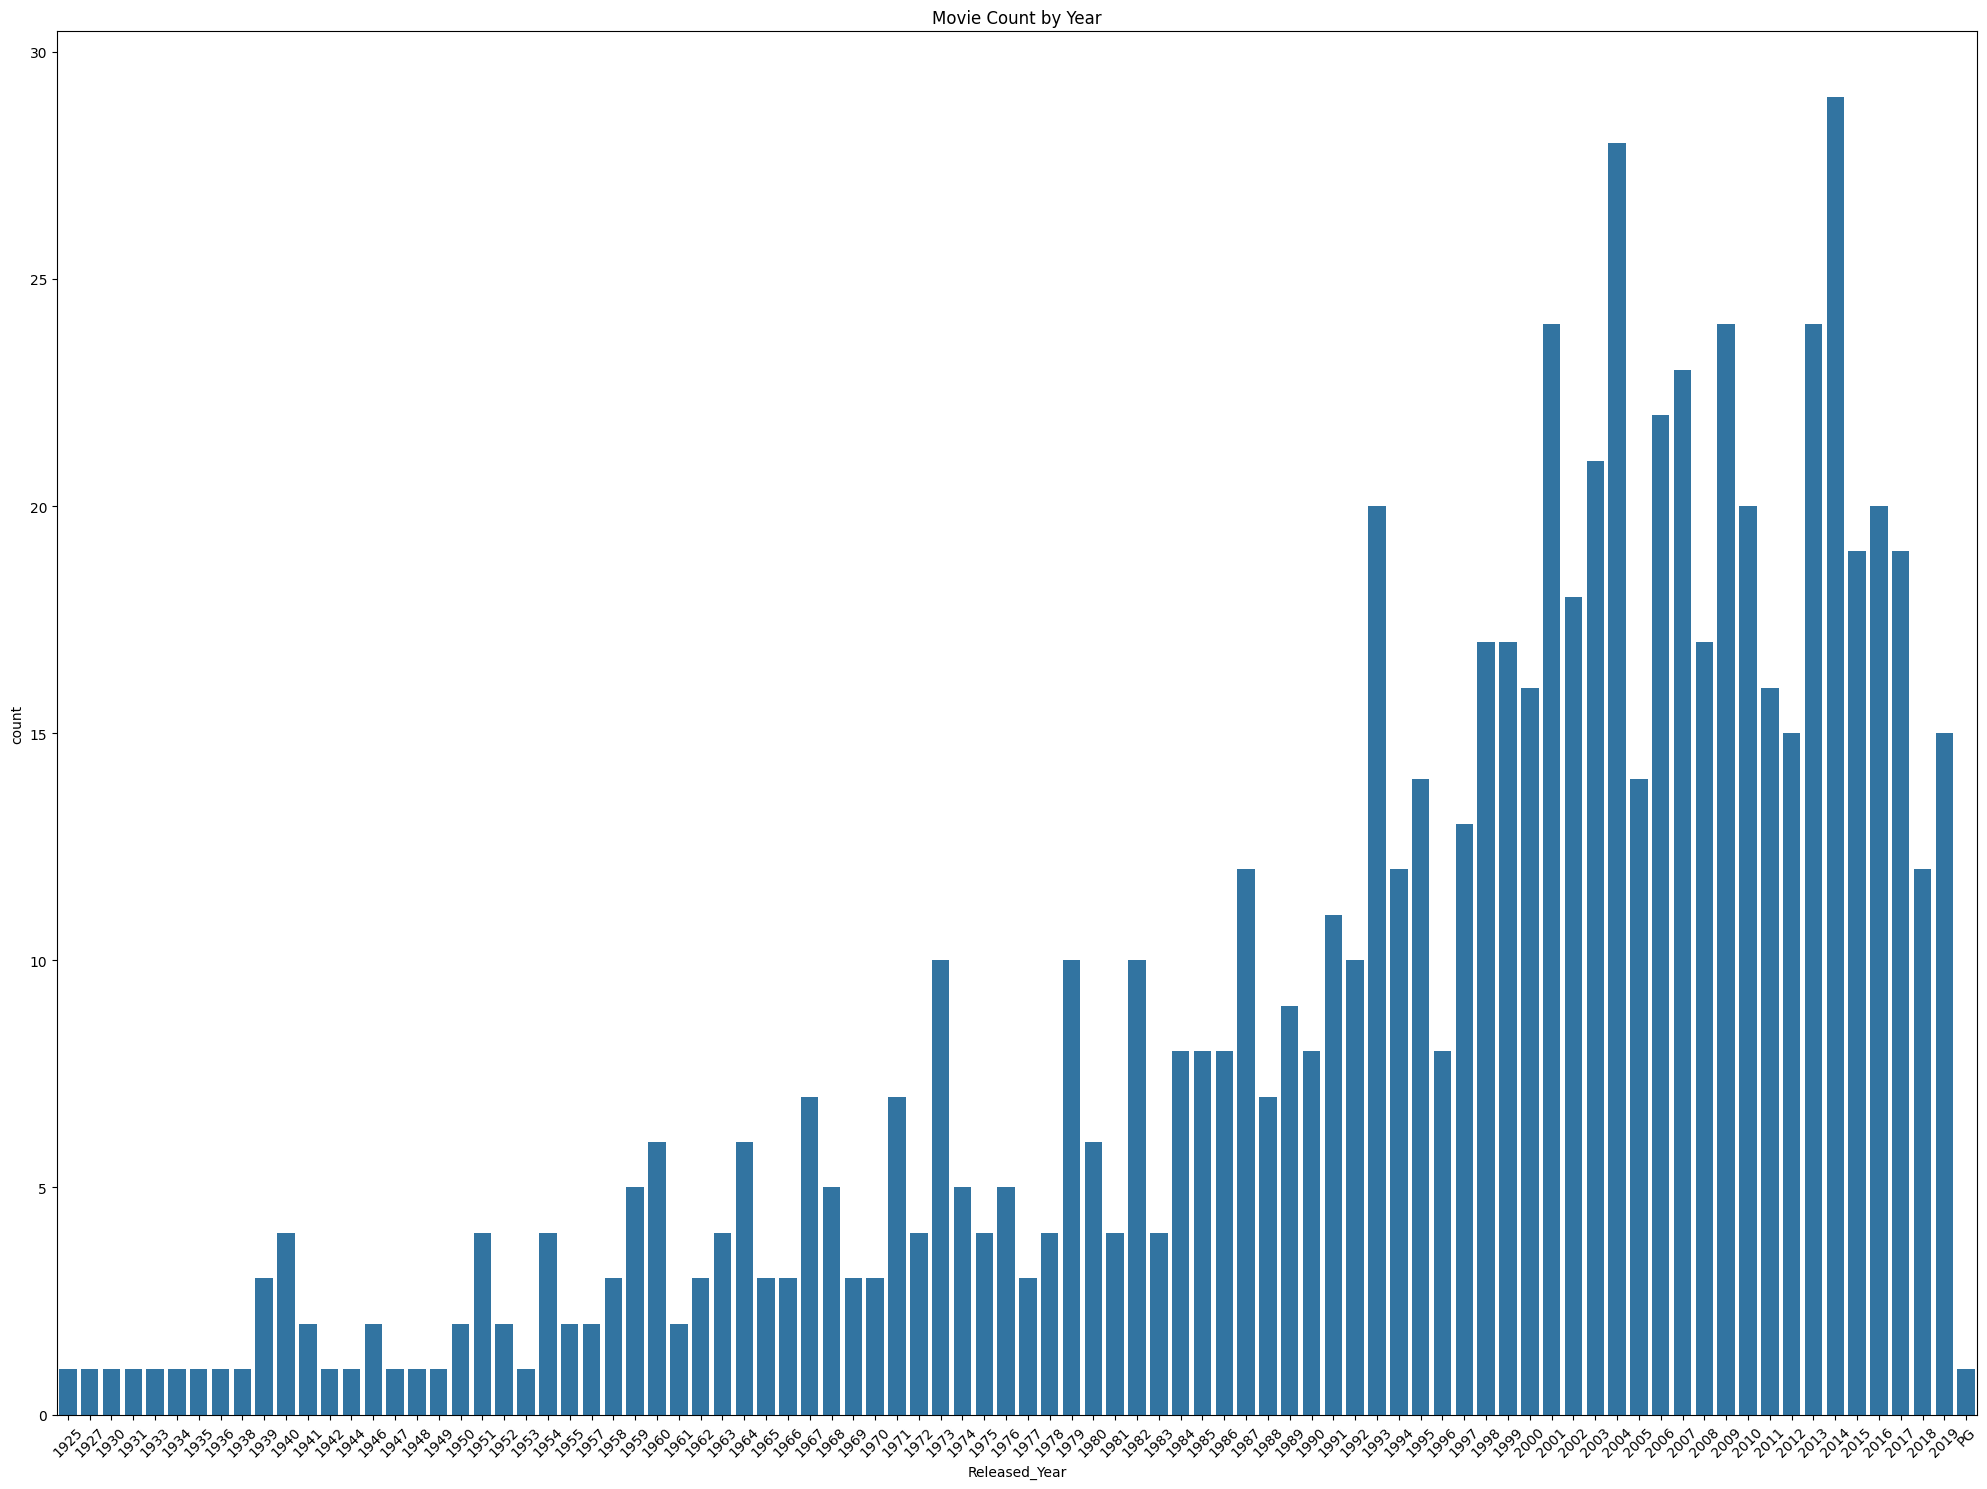

In [24]:
plt.figure(figsize=(20, 15))
sns.countplot(
    data=df,
    x='Released_Year',
    order=sorted(df['Released_Year'].dropna().unique())
)
plt.title('Movie Count by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Heatmap of Correlation Between Numeric Columns


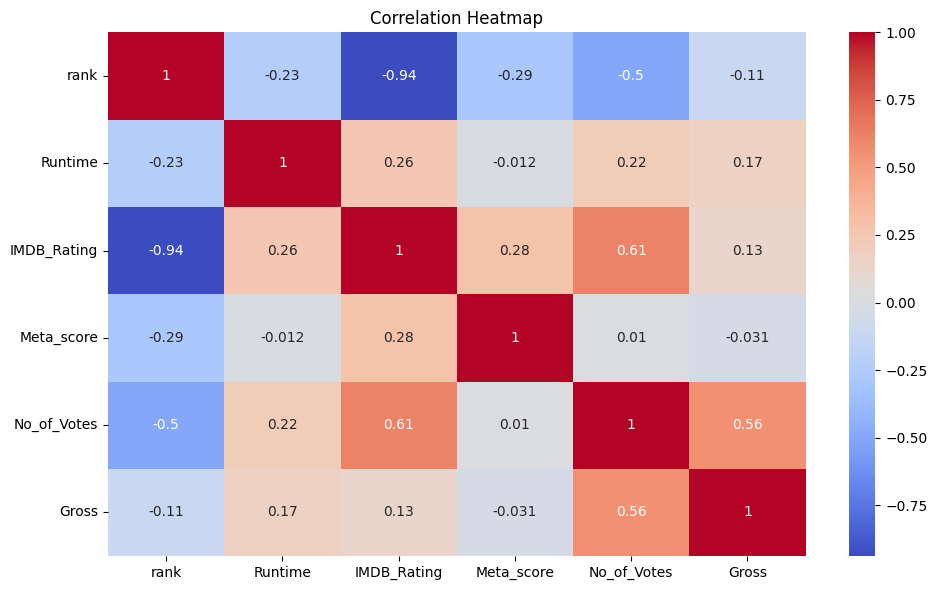

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

✅ Mean Squared Error: 0.04406511115810038
✅ R² Score: 0.46752685227859425
✅ Coefficients: [1.91902413e-03 6.51673752e-03 4.79043158e-07]
✅ Intercept: 7.034504764848908


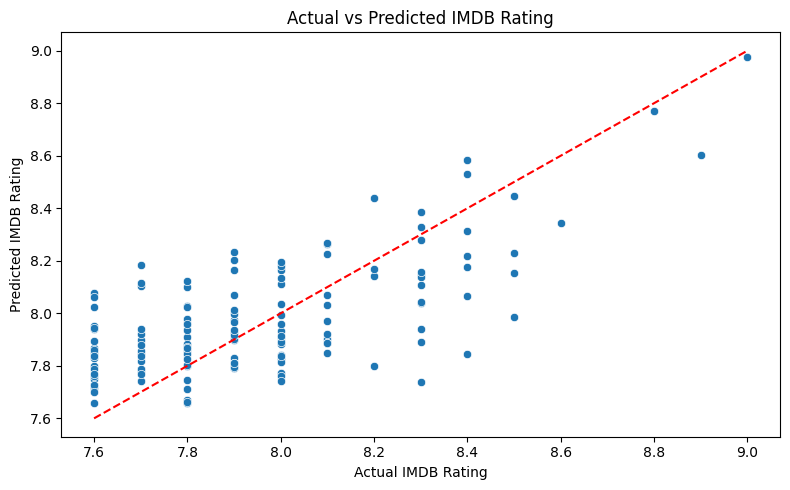

In [26]:
df['Runtime'] = df['Runtime'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else np.nan).astype(float)

# Clean Gross (remove commas and convert to float)
df['Gross'] = df['Gross'].apply(lambda x: str(x).replace(',', '') if pd.notnull(x) else np.nan)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Drop rows with missing values in selected features
df_model = df[['IMDB_Rating', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']].dropna()

# ==== MODELING ====

# Features and target
X = df_model[['Runtime', 'Meta_score', 'No_of_Votes']]
y = df_model['IMDB_Rating']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("✅ Mean Squared Error:", mse)
print("✅ R² Score:", r2)
print("✅ Coefficients:", model.coef_)
print("✅ Intercept:", model.intercept_)

# Plot Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual IMDB Rating")
plt.ylabel("Predicted IMDB Rating")
plt.title("Actual vs Predicted IMDB Rating")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.tight_layout()
plt.show()


In [27]:
import pickle

# Save the model
with open('movie_rating_model.pkl', 'wb') as file:
    pickle.dump(model, file)
